### Install Selenium on Jupyter Notebook
You only need to do this once so that Jupyter can import Selenium

In [18]:
#!pip install selenium

### Import library to change the working directory path

In [19]:
import os
import sys
os.path.dirname(sys.executable)

'C:\\Users\\User\\anaconda3'

### Changing working directory

In [20]:
#Get Current Working Directory
os.getcwd()

#Change Working Directory
os.chdir('C:/Users/User/Documents/Data Science Texas Tech')
os.getcwd()


'C:\\Users\\User\\Documents\\Data Science Texas Tech'

### Importing the libraries needed for the web scraping 

In [21]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

### Define your webdriver of your choice
This is what we will be scraping, specifically the fantasy score of NBA Players. This is tested on a Chrome Browser
Make sure the webdrive is in the same folder as this jupyter notebook file or point the driver defined below to the location of the "chromedriver.exe" file

Selenium won't run without knowing where the browser driver is

In [22]:
# Assign PrizePicks URL

driver= webdriver.Chrome()


### Prize Picks Scrape

Here we will scrape the  prizepicks player names and specifically their fantasy points score

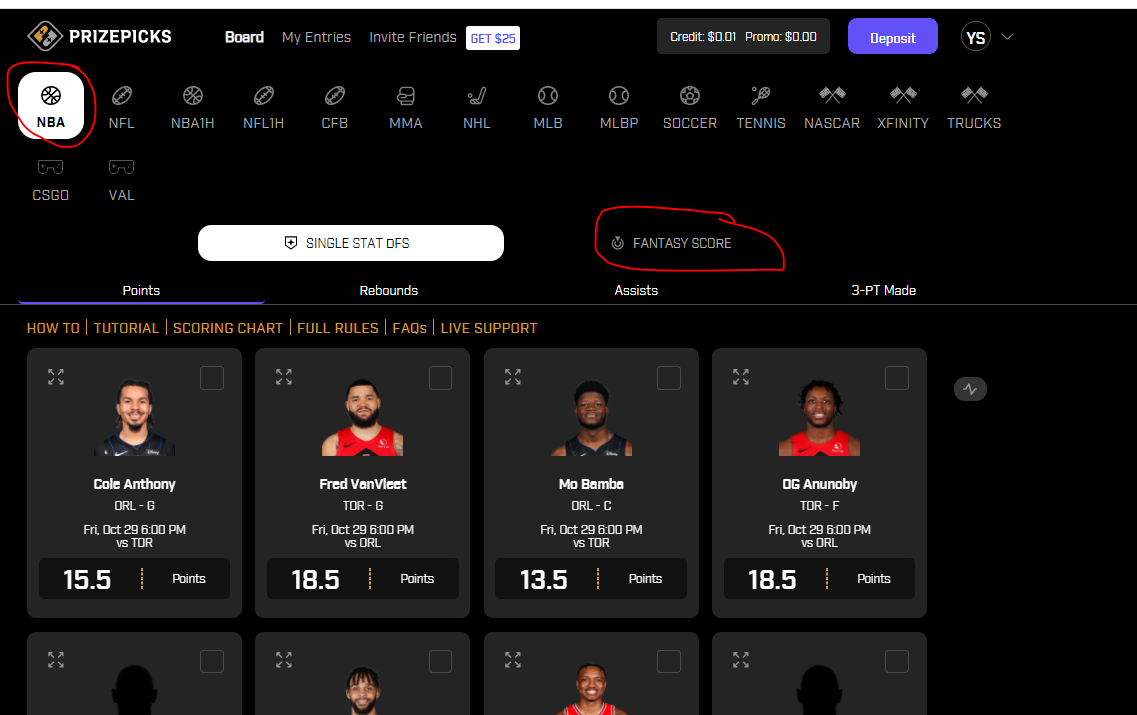

Note the Fantasy Score tab shown below

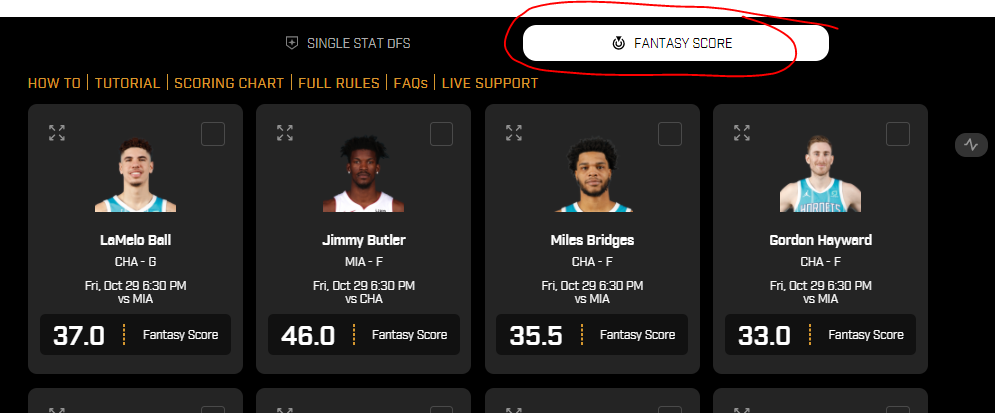

In [23]:
############## PRIZEPICKS ################################################
#
url = "https://app.prizepicks.com/"

driver.get(url)

#this is to get rid of the pop-up box that shows after you Selenium opens the prizepicks page
driver.find_element_by_class_name("close").click()

#Selecting NBA
driver.find_element_by_xpath("//div[@class='name'][normalize-space()= 'NBA']").click() 

#Clicking the Fantasy Score tab
driver.find_element_by_xpath("//div[@class='name'][normalize-space()='Fantasy Score']").click()
projections = WebDriverWait(driver, 20).until(
 EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".projection")))

#creating a list of the players names and fantasy scores to be collected
nbaPlayers = []

for projection in projections:

    names = projection.find_element_by_xpath('.//div[@class="name"]').text
    points= projection.find_element_by_xpath('.//div[@class="presale-score"]').get_attribute('innerHTML')
    print(names, points)

    players = {
        'Name': names,
        'FantasyPoints':points,
        }

    nbaPlayers.append(players)

#Put the list in a dataframe
df = pd.DataFrame(nbaPlayers)


<ipython-input-23-9b9efbdc9446>:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_class_name("close").click()
<ipython-input-23-9b9efbdc9446>:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath("//div[@class='name'][normalize-space()= 'NBA']").click()
<ipython-input-23-9b9efbdc9446>:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath("//div[@class='name'][normalize-space()='Fantasy Score']").click()
C:\Users\User\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:392: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


Cole Anthony 15.5
Fred VanVleet 46.0
Miles Bridges 35.5
Gordon Hayward 33.0
Kyle Lowry 30.5
Mo Bamba 34.0
Fred VanVleet 38.5
Wendell Carter Jr. 32.0
OG Anunoby 35.0
Cole Anthony 31.5
Precious Achiuwa 28.5
Jalen Suggs 21.5
Scottie Barnes 28.5
Kevin Durant 47.5
Domantas Sabonis 47.5
James Harden 44.0
T.J. McConnell 32.0
Joe Harris 22.0
Chris Duarte 26.5
Tyler Herro 29.0
Mason Plumlee 29.0
De'Aaron Fox 42.0
Jonas Valanciunas 41.0
Harrison Barnes 35.5
Brandon Ingram 39.5
Richaun Holmes 33.0
Devonte' Graham 34.0
Tyrese Haliburton 30.0
Nickeil Alexander-Walker 30.0
Luka Doncic 57.0
Nikola Jokic 54.0
Jalen Brunson 31.5
Michael Porter Jr. 32.0
Tim Hardaway Jr. 29.5
Will Barton 30.0
Dorian Finney-Smith 25.0


### ESPN Scrape

We will now use the names of the players scraped from Prize Picks and put each one in the search bar in ESPN
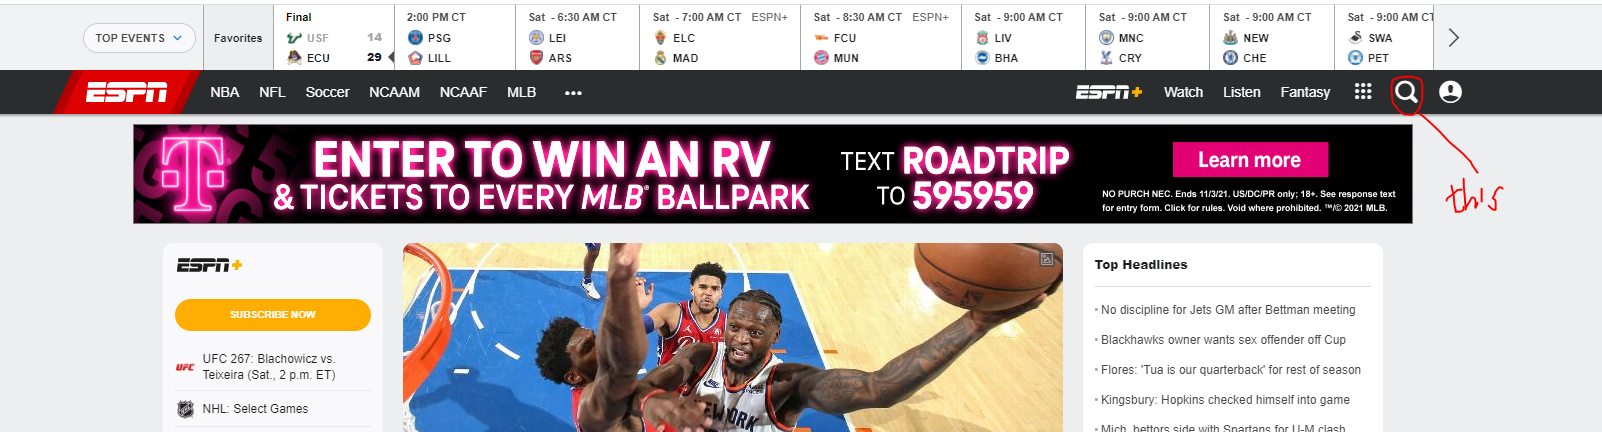

The total Fantasy Score is calculated as:

Fantasy Score = (Points * 1) + (Rebound * 1.2) + (Assist * 1.5) + (Block * 3) + (Steal * 3) + (Turnover * -1)

We are specifically interested in scraping the data from the last 10 game average row shown on the player's page

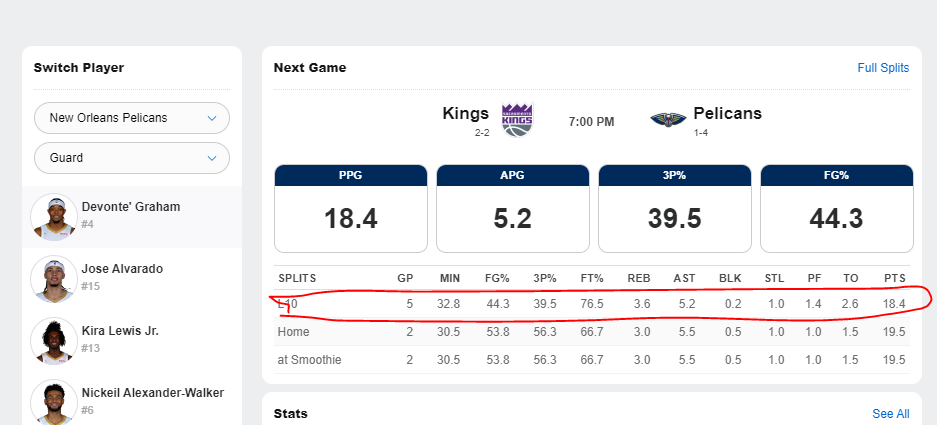

In [26]:
# New ESPN URL
new_url = "https://www.espn.com"

# Open a new window
driver.execute_script("window.open('');")
  
# Switch to the new window and open new URL
driver.switch_to.window(driver.window_handles[1])
driver.get(new_url)


########################### ESPN #################################################
#Scraping ESPN and clicking the search button
driver.find_element_by_xpath("//a[@id='global-search-trigger']").click()

#list to store scraped data
espnProjections = []
games = []
length = len(df)


#sending data to the search button
driver.find_element_by_xpath("//input[@placeholder='Search Sports, Teams or Players...']").send_keys(df.iloc[0,:].values[0])
WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".search_results__details")))
playerPage = driver.find_element_by_css_selector(".search_results__details").click()
WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//td[@class='Table__TD']")))


#Scraping data from Player's Individual Stat Pages
for j, row in df.iterrows(): 
  
        driver.find_element_by_xpath("//li[@class='Nav__Primary__Menu__Item Nav__Search flex-none relative']//*[local-name()='svg']").click()
        driver.find_element_by_xpath("//input[@placeholder='Search Sports, Teams or Players...']").send_keys(df.iloc[(j),:].values[0])
        WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//li[@class='Nav__Primary__Menu__Item Nav__Search flex-none relative']//li[1]//a[1]")))
        playerPage = driver.find_element_by_xpath("//li[@class='Nav__Primary__Menu__Item Nav__Search flex-none relative']//li[1]//a[1]").click()
    
        #Scraping data from last 10 games
        WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//td[@class='Table__TD']")))
        points = driver.find_elements_by_xpath("//td[@class='Table__TD']")[12].text
        rebs = driver.find_elements_by_xpath("//td[@class='Table__TD']")[6].text
        asts = driver.find_elements_by_xpath("//td[@class='Table__TD']")[7].text
        blks = driver.find_elements_by_xpath("//td[@class='Table__TD']")[8].text
        stls = driver.find_elements_by_xpath("//td[@class='Table__TD']")[9].text
        tnvrs = driver.find_elements_by_xpath("//td[@class='Table__TD']")[11].text
        gamess = driver.find_elements_by_xpath("//td[@class='Table__TD']")[1].text
        projectedPoints = float(points)+(float(rebs)*1.2)+(float(asts)*1.5)+(float(blks)*3)+(float(stls)*3)-(float(tnvrs)*1)
        gamesPlayed = float(gamess)*1
        
        #Appending Calculated Points to list per player
        espnProjections.append(projectedPoints)
        games.append(gamesPlayed)

        if j == length:
          break
df['games'] = games
df['espnProjections'] = espnProjections
df['Over Under'] = df['espnProjections'] - df['FantasyPoints'].astype(float)

print(df)

driver.quit()

MaxRetryError: HTTPConnectionPool(host='localhost', port=62758): Max retries exceeded with url: /session/77234280de641b5466e3d48682fecf80/execute/sync (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000016212390640>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

### Results & Final Thoughts

The dataframe below shows the PrizePicks projections compared with the ESPN projections (using the rolling average of the last 10 games played). Because the season is still relatively new, the average used here is 5 games as of 10/28/21

The Over/Under column will guide us in selecting the players that will most likely go over or under the PrizePicks projections. I typically choose players with +/- 2.5 points over/under the PrizePick projections

One last thing to note, do not run this script continuously because ESPN or Prizepicks may detect that you're a bot and block your IP address

Goodluck on your selections!!!

In [27]:
print(df)

                        Name FantasyPoints  games  espnProjections  Over Under
0               Cole Anthony          15.5    5.0            34.78       19.28
1              Fred VanVleet          46.0    5.0            38.22       -7.78
2              Miles Bridges          35.5    5.0            43.90        8.40
3             Gordon Hayward          33.0    5.0            30.80       -2.20
4                 Kyle Lowry          30.5    3.0            23.55       -6.95
5                   Mo Bamba          34.0    5.0            32.48       -1.52
6              Fred VanVleet          38.5    5.0            38.22       -0.28
7         Wendell Carter Jr.          32.0    5.0            31.38       -0.62
8                 OG Anunoby          35.0    5.0            36.76        1.76
9               Cole Anthony          31.5    5.0            34.78        3.28
10          Precious Achiuwa          28.5    5.0            26.34       -2.16
11               Jalen Suggs          21.5    5.0   